In [78]:
import math
from sympy import *
init_printing(use_unicode=True)
x =symbols('x')

In [79]:
from icecream import ic
import random

# Uniwersalne funkcje do wyliczania Taylora oraz rysowania wykresow

In [80]:
def getTaylorSeriesWithComponents(func, Nn, x0, returnComponents=True):
    skladowe = []
    szeregTaylora = 0
    for n in range(0, Nn+1):
        pochodna = diff(func, x, n)
        pochodnaX0 = pochodna.subs(x, x0)
        skladowa = pochodnaX0 / math.factorial(n) * ((x - x0)**n)
        # ic(pochodna, pochodnaX0, skladowa)
        skladowe.append(skladowa)
        szeregTaylora += skladowa
    if returnComponents:
        return szeregTaylora, skladowe
    else:
        return szeregTaylora

def calculateTaylorComponents(func, Nn, x0):
    skladowe = []
    for n in range(0, Nn+1):
        pochodna = diff(func, x, n)
        pochodnaX0 = pochodna.subs(x, x0)
        skladowa = pochodnaX0 / math.factorial(n) * ((x - x0)**n)
        # ic(pochodna, pochodnaX0, skladowa)
        skladowe.append(skladowa)
    return skladowe

def getTaylorSeries(skladowe):
    # szeregTaylora = 0
    # for skladowa in skladowe:
    #     szeregTaylora += skladowa
    # return szeregTaylora
    return sum(skladowe)

def getPlots(funcsWithPlotParameters, title, rangeX=(-5, 5)):
    plots = plot(show=False, xlabel='x', ylabel='y', legend=True, title=title, ylim=(-10, 10))
    for fp in funcsWithPlotParameters:
        func = fp.get('func', None)
        if func:
            color = fp.get('color', 'blue')
            label = fp.get('label', '')
            p = plot(func, (x, rangeX[0], rangeX[1]), show=False, line_color=color, label=label, ylim=(-10, 10))
            plots.append(p[0])
    plots.show()
    return plots

# Zadanie T1

In [81]:
def t1(func, Nn, x0):
    ic(func, Nn, x0)
    skladowe = calculateTaylorComponents(func ,Nn, x0)
    szeregTaylora = getTaylorSeries(skladowe)
    ic(skladowe, szeregTaylora)
    # Pierwszy układ wykresów - wykres funkcji i jej N-tego przybliżenia
    wykresFunkcjiOrazTaylora = getPlots([{'func':func, 'color':"red", 'label':"f(x)"},
                                     {'func':szeregTaylora, 'color':"blue", 'label':"taylor"}],
                                    "Wykres funkcji i jej N-tego przyblizenia", (x0-5, x0+5))
    # Drugi układ wykresów - wykres tailora i wszystkich składowych
    taylorPlotData = [{'func': szeregTaylora, 'color': "red", 'label': "taylor"}]  # Dodanie danych wykresu Taylora
    for i, skladowa in enumerate(skladowe):
        if skladowa:
            randomColor = '#' + ''.join([random.choice('123456789ABCDE') for j in range(6)])
            taylorPlotData.extend([{'func': skladowa, 'color': randomColor, 'label': f"a{i}"}]) # Dodanie danych wykresow skladowych
    wykresTayloraOrazSkladowych = getPlots(taylorPlotData, "Wykres taylora oraz wykresy jego skladowych", (x0-5, x0+5))
    return [s for s in skladowe if s != 0], szeregTaylora, wykresFunkcjiOrazTaylora, None#wykresTayloraOrazSkladowych

ic| func: sin(x), Nn: 7, x0: 0
ic| skladowe: [0, x, 0, -x**3/6, 0, x**5/120, 0, -x**7/5040]
    szeregTaylora: -x**7/5040 + x**5/120 - x**3/6 + x


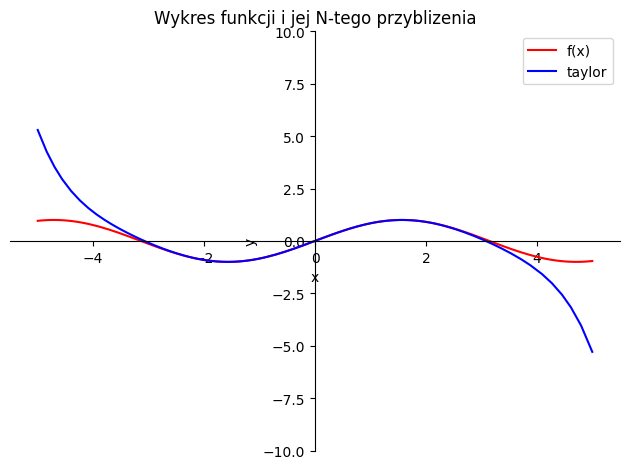

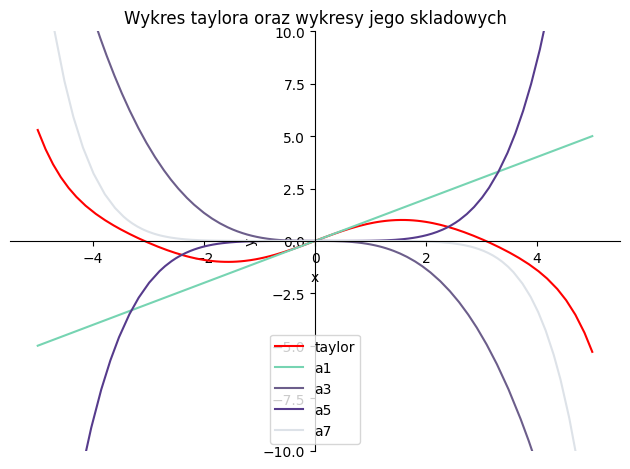

[x, -x**3/6, x**5/120, -x**7/5040]
-x**7/5040 + x**5/120 - x**3/6 + x


In [82]:
t1Func = sin(x)
# t1Func = E**x
# t1Func = 1/x
t1N = 7
t1X0 = 0
# t1X0 = 1
w1, w2, w3, w4 = t1(t1Func, t1N, t1X0)
print(w1)
print(w2)

# Zadanie T2

In [83]:
def t2(func, N1, N2, x0):
    ic(func, N1, N2, x0)
    przyblizenia = []

    stareprzyblizenia = []
    for n in range(N1, N2+1):
        taylor = getTaylorSeriesWithComponents(func, n, x0, False)
        stareprzyblizenia.append(taylor)
    ic(stareprzyblizenia)

    skladowe = calculateTaylorComponents(func, N2, x0)
    for i in range(N1, N2+1):
        taylor = getTaylorSeries(skladowe[:i+1])
        przyblizenia.append(taylor)
    ic(przyblizenia)

    # Wykres funkcji i wszystkich przyblizen od N1 do N2
    functionPlotData = [{'func': func, 'color': "red", 'label': "f(x)"}]  # Dodanie danych wykresu Funkcji
    for i, przyblizenie in enumerate(przyblizenia):
        if przyblizenie:
            randomColor = '#' + ''.join([random.choice('123456789ABCDE') for j in range(6)])
            functionPlotData.extend([{'func': przyblizenie, 'color': randomColor, 'label': f"taylor{N1+i}"}]) # Dodanie danych wykresow przyblizen
    wykresFunkcjiOrazJejPrzyblizen = getPlots(functionPlotData, "Wykres funkcji f(x) oraz jej przyblizen", (x0-5, x0+5))
    return przyblizenia, wykresFunkcjiOrazJejPrzyblizen

ic| func: sin(x), N1: 3, N2: 7, x0: 0
ic| stareprzyblizenia: [-x**3/6 + x,
                        -x**3/6 + x,
                        x**5/120 - x**3/6 + x,
                        x**5/120 - x**3/6 + x,
                        -x**7/5040 + x**5/120 - x**3/6 + x]
ic| przyblizenia: [-x**3/6 + x,
                   -x**3/6 + x,
                   x**5/120 - x**3/6 + x,
                   x**5/120 - x**3/6 + x,
                   -x**7/5040 + x**5/120 - x**3/6 + x]


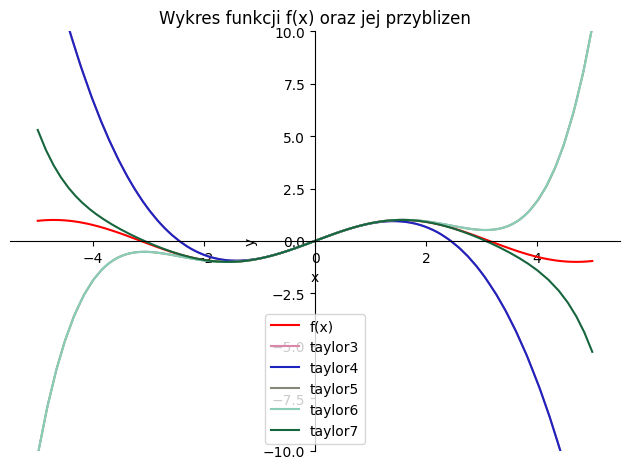

In [84]:
# t2Func = sin(x)
t2Func = t1Func
t2N1 = 3
t2N2 = 7
# t2X0 = 0
t2X0 = t1X0
w1, w2 = t2(t2Func, t2N1, t2N2, t2X0)

# Zadanie T3

In [85]:
t3Func1 = cos(x)
t3Func2 = 1 / (1-x)
t3Func3 = log(1 / (1-x))

# t3Maclaurin1 = getTaylorSeriesWithComponents(t3Func1, 5 ,0, False)
# t3Maclaurin2 = getTaylorSeriesWithComponents(t3Func2, 5 ,0, False)
# t3Maclaurin3 = getTaylorSeriesWithComponents(t3Func3, 5 ,0, False)
t3Maclaurin1 = getTaylorSeries(calculateTaylorComponents(t3Func1, 5 ,0))
t3Maclaurin2 = getTaylorSeries(calculateTaylorComponents(t3Func2, 5 ,0))
t3Maclaurin3 = getTaylorSeries(calculateTaylorComponents(t3Func3, 5 ,0))

ic(t3Maclaurin1)
ic(t3Maclaurin2)
ic(t3Maclaurin3)

ic| t3Maclaurin1: x**4/24 - x**2/2 + 1
ic| t3Maclaurin2: x**5 + x**4 + x**3 + x**2 + x + 1
ic| t3Maclaurin3: x**5/5 + x**4/4 + x**3/3 + x**2/2 + x
